

# Heart Failure Prediction
Predicting probability of death from heart disease based on different risk factors
# Project Proposal
Using  Heart Failure Clinical Data databases, our goal is to identify which risk factors are more strongly related to the death from heart disease, and develop a model to predict the probability of death due to heart disease using these risk factors.
# Reference to Data Sources

## Heart Failure Clinical Data
Creator
Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020).
Original Publication
https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5

*Link*
https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


#Project Codes


##Features Explanation:


>age: Age of the patient       

>Anaemia: Decrease of red blood cells or hemoglobin (0 = no, 1 = yes)

>High blood pressure: If a patient has hypertension (0 = no, 1 = yes)  

>Creatinine phosphokinase (CPK): Level of the CPK enzyme in the blood (range from 23mcg/L to 7861mcg/L)

>Diabetes: If the patient has diabetes (0 = no, 1 = yes)

>Ejection fraction: Percentage of blood leaving (range from 14% to 80%)

>sex: The person's sex (1 = male, 0 = female)

>Platelets: Platelets in the blood (range from 25 kiloplatelets/mL to 850 kiloplatelets/mL)

>Serum creatinine: Level of creatinine in the blood (range from 0.50mg/dL to 9.40mg/dL)

>Serum sodium: Level of sodium in the blood (range from 114mEq/L to 148mEq/L)    

>Smoking: If the patient smokes  (0 = no, 1 = yes) 

>Time: Follow-up period (range from 4 days to 285 days)

>(target) death event: If the patient died during the follow-up period (0 = no, 1 = yes)



>Boolean features
>*   Sex: Gender of patient Male = 1, Female =0
>*   Diabetes: 0 = No, 1 = Yes
>*   Anaemia: 0 = No, 1 = Yes
>*   High_blood_pressure: 0 = No, 1 = Yes
>*   Smoking: 0 = No, 1 = Yes
>*   DEATH_EVENT: 0 = No, 1 = Yes


    
    



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
url = 'https://raw.githubusercontent.com/laiz6660666/BA765-Session02/master/heart_failure_clinical_records_dataset.csv'
clinical = pd.read_csv(url)
clinical.head()
clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


#VISUALIZATION


# Overview For Different Features


> An overview for all features, help us to easier find peak value and compare with each other




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f423afd1c18>,
      dtype=object)

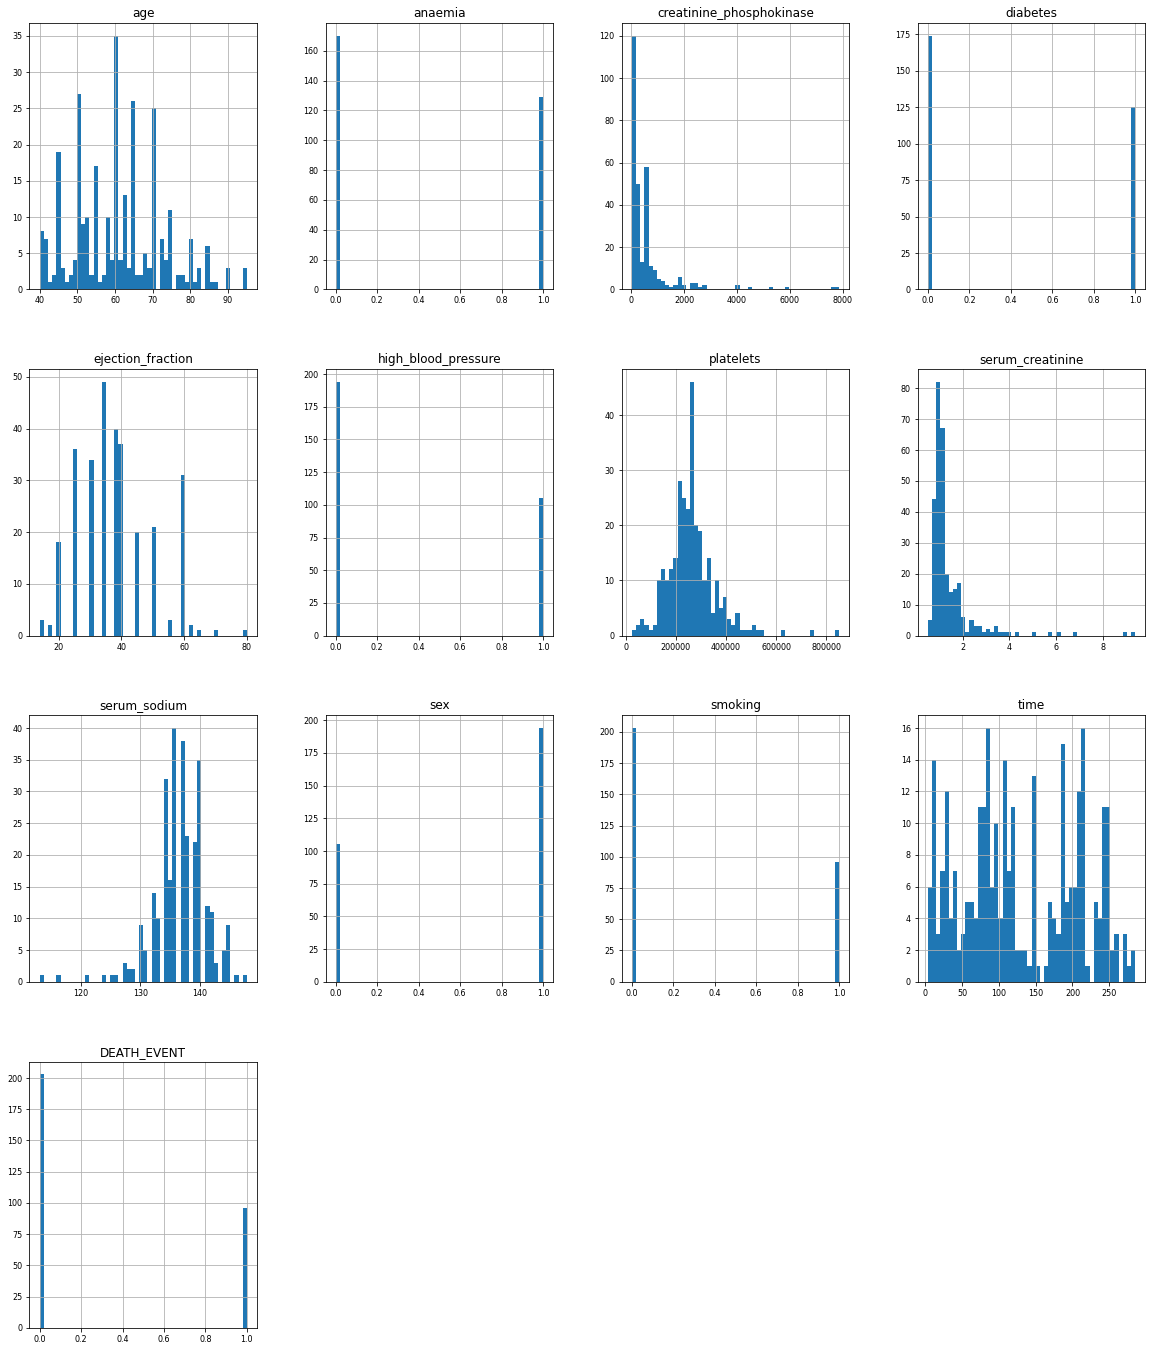

In [ ]:
clinical.hist(figsize=(20, 24), bins=50, xlabelsize=8, ylabelsize=8)


#Heatmap for correlation between each feature 

> The following heatmap shows the correlation between each feature
> - The higher the correlation coefficient means these two variables are more dependent to each other





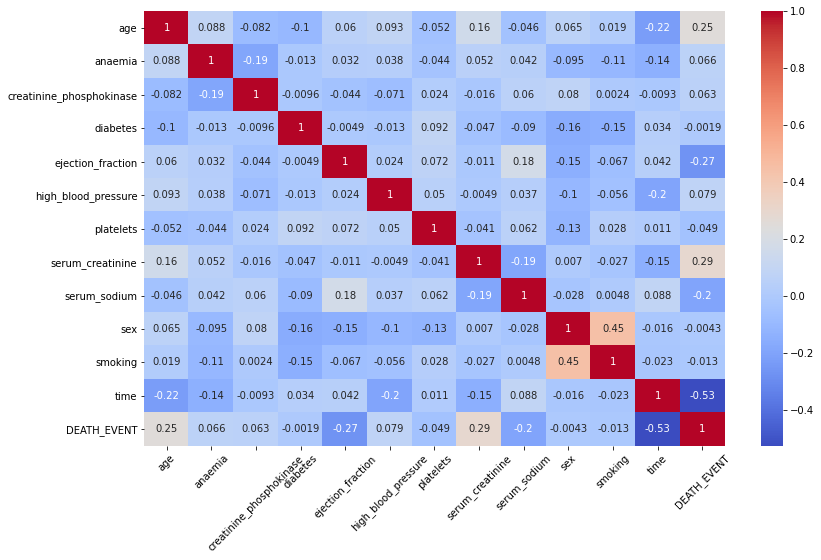

In [ ]:
# Correlation between each feature 
plt.figure(figsize=(13,8))
sns.heatmap(clinical.corr(), annot = True, cmap = 'coolwarm')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
correlation = clinical.corr()
corr_target = abs(correlation['DEATH_EVENT'])
critical_features = corr_target[corr_target > 0.1]
critical_features

age                  0.253729
ejection_fraction    0.268603
serum_creatinine     0.294278
serum_sodium         0.195204
time                 0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

#### Gender
> Within our clinical records, there are much more male patients (65%) with heart failure than female patients(35%).

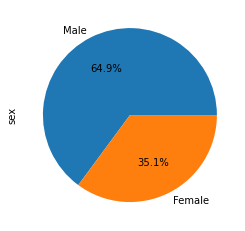

In [ ]:
clinical.sex.value_counts().plot(kind='pie', labels={'Female', 'Male'}, autopct='%1.1f%%')

#### Creatinine Phosphokinase
>The typical range of Creatinine Phosphokinase for heart disease patients are usually within (0, 250) or around 600.

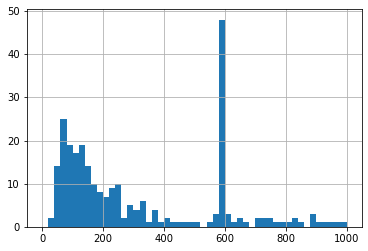

In [ ]:
clinical.creatinine_phosphokinase.hist(bins=50,range=(0, 1000))

#### Age
>* The age histogram below shows that the patients within the age group [54,61] are more likely to have heart failure.
>*   As the age grows, patients will have higher and higher chance of dying from the disease.












In [26]:
#Heart Failure Distribution for Ages

#plt.figure(figsize=(18, 10))
#sns.distplot(clinical.age[clinical['DEATH_EVENT'] == 0], bins=30, color='blue', label='Alive')
#sns.distplot(clinical.age[clinical['DEATH_EVENT'] == 1], bins=30, color='red', label='Dead')
#plt.legend()
#plt.title('Heart Failure Distribution for Ages')
#plt.xlabel('Age')
#plt.ylabel('Frequency')
#plt.show()

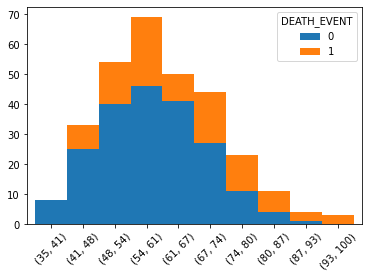

In [ ]:
def hist(x):
    h, e = np.histogram(x.dropna(), range=(35, 100))
    e = e.astype(int)
    return pd.Series(h, zip(e[:-1], e[1:]))

kw = dict(stacked=True, width=1, rot=45)
clinical.groupby('DEATH_EVENT').age.apply(hist).unstack(0).plot.bar(**kw)

#### Serum Creatinine
> The Serum Creatinine histogram below shows that the patients with higher SC value will have higher mortality rate.

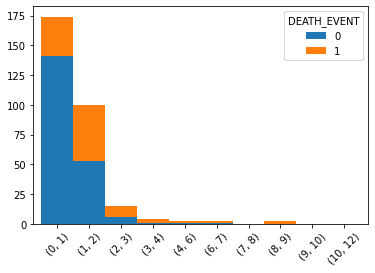

In [ ]:
def hist(x):
    h, e = np.histogram(x.dropna(), range=(0, 12))
    e = e.astype(int)
    return pd.Series(h, zip(e[:-1], e[1:]))

kw = dict(stacked=True, width=1, rot=45)
clinical.groupby('DEATH_EVENT').serum_creatinine.apply(hist).unstack(0).plot.bar(**kw)

#### Anaemia
>The impact of anaemia on death: The patients having anaemia has higher chance of death than these without as 35.7% > 29.4%

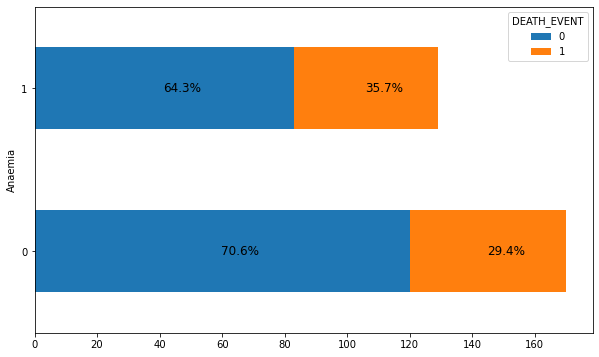

In [ ]:
anaemia = clinical.groupby('anaemia')['DEATH_EVENT'].value_counts()[1]
non_anaemia = clinical.groupby('anaemia')['DEATH_EVENT'].value_counts()[0]
anaemia = anaemia*(100/anaemia.sum())
non_anaemia = non_anaemia*(100/non_anaemia.sum())
df2 = pd.DataFrame(np.array([list(anaemia), list(non_anaemia)]), index = ['anaemia', 'non_anaemia'], columns = ['No', 'Yes'])

ax = clinical.groupby('anaemia')['DEATH_EVENT'].value_counts().unstack(level=1).plot.barh(stacked=True, figsize=(10, 6))
ax.set_ylabel("Anaemia")

# Set txt
kx = -0.3
ky = -0.02

values = [70.58823529411765, 64.34108527131784, 29.411764705882355, 35.65891472868217]

for i,rec in enumerate(ax.patches):
    ax.text(rec.get_xy()[0]+rec.get_width()/2+kx,rec.get_xy()[1]+rec.get_height()/2+ky,'{:.1%}'.format(values[i]/100), fontsize=12, color='black')

#### Diabetes
> Diabetes has little impact on the death rate of heart failure, as the patients with or without diabetes are having approximately the same probability of death

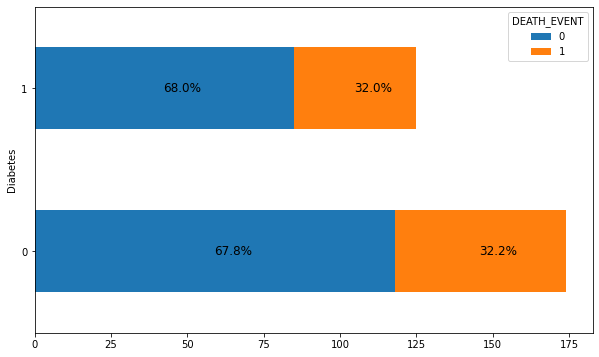

In [ ]:
diabetes = clinical.groupby('diabetes')['DEATH_EVENT'].value_counts()[1]
non_diabetes = clinical.groupby('diabetes')['DEATH_EVENT'].value_counts()[0]
diabetes = diabetes*(100/diabetes.sum())
non_diabetes = non_diabetes*(100/non_diabetes.sum())
df2 = pd.DataFrame(np.array([list(anaemia), list(non_anaemia)]), index = ['diabetes', 'non_diabetes'], columns = ['No', 'Yes'])

ax = clinical.groupby('diabetes')['DEATH_EVENT'].value_counts().unstack(level=1).plot.barh(stacked=True, figsize=(10, 6))
ax.set_ylabel("Diabetes")

# Set txt
kx = -0.3
ky = -0.02

values = [67.816092, 68.000000, 32.183908, 32.000000]

for i,rec in enumerate(ax.patches):
    ax.text(rec.get_xy()[0]+rec.get_width()/2+kx,rec.get_xy()[1]+rec.get_height()/2+ky,'{:.1%}'.format(values[i]/100), fontsize=12, color='black')

#### Smoking
> Smoking has little impact on the mortality rate of heart failure, as the patients with or without smoking habit are having approximately the same probability of death

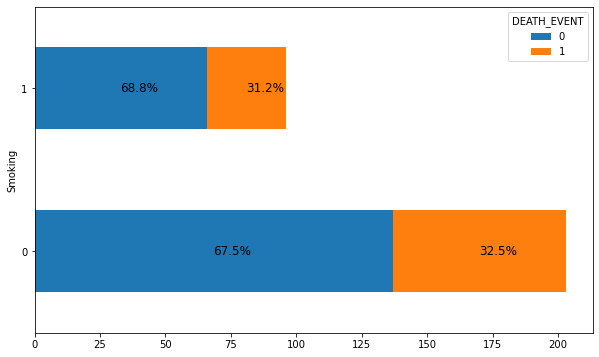

In [ ]:
smoking = clinical.groupby('smoking')['DEATH_EVENT'].value_counts()[1]
non_smoking = clinical.groupby('smoking')['DEATH_EVENT'].value_counts()[0]
smoking = smoking*(100/smoking.sum())
non_smoking = non_smoking*(100/non_smoking.sum())
df2 = pd.DataFrame(np.array([list(smoking), list(non_smoking)]), index = ['smoking', 'non_smoking'], columns = ['No', 'Yes'])

ax = clinical.groupby('smoking')['DEATH_EVENT'].value_counts().unstack(level=1).plot.barh(stacked=True, figsize=(10, 6))
ax.set_ylabel("Smoking")

# Set txt
kx = -0.3
ky = -0.02

values = [67.487685, 68.750000, 32.512315, 31.250000]

for i,rec in enumerate(ax.patches):
    ax.text(rec.get_xy()[0]+rec.get_width()/2+kx,rec.get_xy()[1]+rec.get_height()/2+ky,'{:.1%}'.format(values[i]/100), fontsize=12, color='black')

#### High Blood Pressure
>The impact of high blood pressure on death: The patients having high blood pressure are more likely to die from heart disease than these without as 37.1% > 29.4%

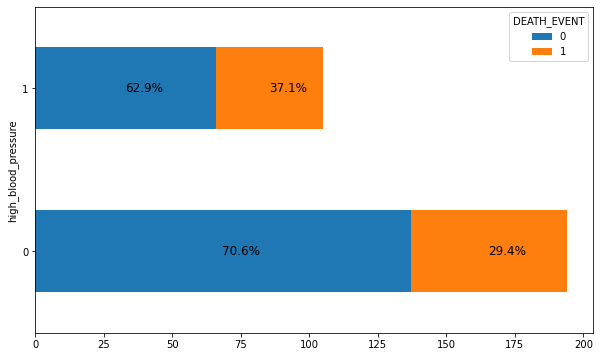

In [ ]:
high_blood_pressure = clinical.groupby('high_blood_pressure')['DEATH_EVENT'].value_counts()[1]
non_high_blood_pressure = clinical.groupby('high_blood_pressure')['DEATH_EVENT'].value_counts()[0]
high_blood_pressure = high_blood_pressure*(100/high_blood_pressure.sum())
non_high_blood_pressure = non_high_blood_pressure*(100/non_high_blood_pressure.sum())
df2 = pd.DataFrame(np.array([list(high_blood_pressure), list(non_high_blood_pressure)]), index = ['high_blood_pressure', 'non_high_blood_pressure'], columns = ['No', 'Yes'])

ax = clinical.groupby('high_blood_pressure')['DEATH_EVENT'].value_counts().unstack(level=1).plot.barh(stacked=True, figsize=(10, 6))
ax.set_ylabel("high_blood_pressure")

# Set txt
kx = -0.3
ky = -0.02

values = [70.618557, 62.857143, 29.381443, 37.142857]

for i,rec in enumerate(ax.patches):
    ax.text(rec.get_xy()[0]+rec.get_width()/2+kx,rec.get_xy()[1]+rec.get_height()/2+ky,'{:.1%}'.format(values[i]/100), fontsize=12, color='black')

# Relations

#Serum Creatinine vs. Serum Sodium


> - As we see on the scatterplot, the death event concentrated on serum creatinine level between 2mg/dL and 4mg/dL & serum sodium level between 125mEq/L and 135mEq/L
> - Patients are more likely to die when serum creatinine level above 6mg/dL





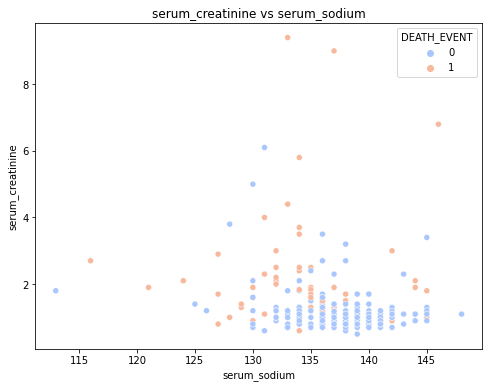

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='serum_sodium',y='serum_creatinine',data=clinical,hue='DEATH_EVENT', palette='coolwarm')
plt.title('serum_creatinine vs serum_sodium')
plt.show()


#Serum Creatinine vs. Age

> - As we see on the scatterplot, the death event concentrated on serum creatinine level = 2mg/dL and age is above 70 years old

> - Patients are more likely to die when serum creatinine level is high than or age is larger than 70 years old






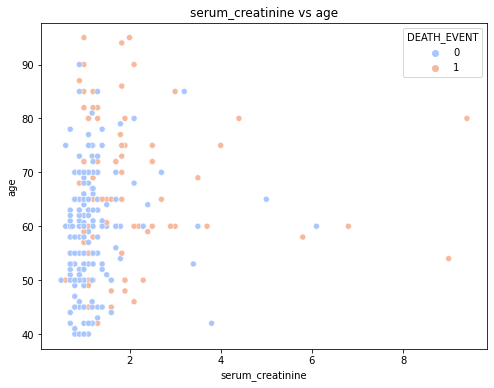

In [4]:
plt.figure(figsize=(8,6))
sns.scatterplot(y='age',x='serum_creatinine',data=clinical,hue='DEATH_EVENT', palette='coolwarm')
plt.title('serum_creatinine vs age')
plt.show()

#Age vs. Ejection fraction

> - As we see on the scatterplot, the death event concentrated on ejection fraction from 20 to 30, and most patients who died are in the range of 50 year-old to 80 year-old
> - Patients are more likely to die when ejection fraction below 40, which at lower level compare to those who alive

<Figure size 576x432 with 0 Axes>

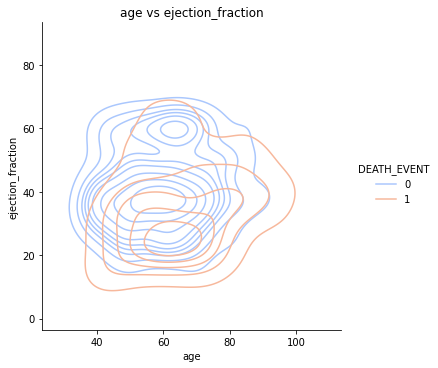

In [35]:
plt.figure(figsize=(8,6))
sns.displot(y='ejection_fraction',x='age',data=clinical,hue='DEATH_EVENT', palette='coolwarm',kind='kde')
plt.title('age vs ejection_fraction')
plt.show()

#Age vs. Time

<Figure size 576x432 with 0 Axes>

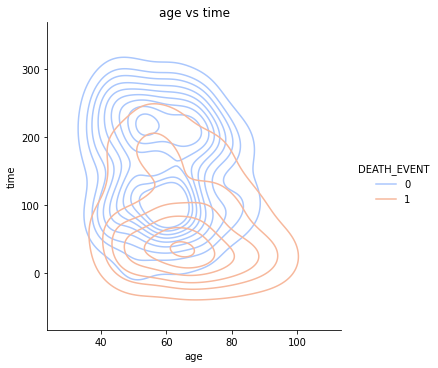

In [39]:
plt.figure(figsize=(8,6))
sns.displot(y='time',x='age',data=clinical,hue='DEATH_EVENT', palette='coolwarm',kind='kde')
plt.title('age vs time')
plt.show()